In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv("D:\\DataScience\\Machine-Learning-Projects\\Cars-Price-Predictor\\Datasets\\USA_cars_datasets.csv")

## Preprocessing

In [5]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [7]:
df = df.iloc[:, 1:]

In [8]:
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


## Summary of the USA-cars-dataset

US Cars'data was scraped from AUCTION EXPORT.com. This dataset included Information about 28 brands of clean and used vehicles for sale in US. Twelve features were assembled for each car in the dataset.

## Column Description

* This dataset includes 12 features:

<table>
<thead>
<tr>
<th>Feature</th>
<th>Type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>Price</td>
<td>Integer</td>
<td>The sale price of the vehicle in the ad</td>
</tr>
<tr>
<td>Years</td>
<td>Integer</td>
<td>The vehicle registration year</td>
</tr>
<tr>
<td>Brand</td>
<td>String</td>
<td>The brand of car</td>
</tr>
<tr>
<td>Model</td>
<td>String</td>
<td>model of the vehicle</td>
</tr>
<tr>
<td>Color</td>
<td>String</td>
<td>Color of the vehicle</td>
</tr>
<tr>
<td>State/City</td>
<td>String</td>
<td>The location in which the car is being available for purchase</td>
</tr>
<tr>
<td>Mileage</td>
<td>Float</td>
<td>miles traveled by vehicle</td>
</tr>
<tr>
<td>Vin</td>
<td>String</td>
<td>The vehicle identification number is a collection of 17 characters (digits and capital letters)</td>
</tr>
<tr>
<td>Title Status</td>
<td>String</td>
<td>This feature included binary classification, which are clean title vehicles and salvage insurance</td>
</tr>
<tr>
<td>Lot</td>
<td>Integer</td>
<td>A lot number is an identification number assigned to a particular quantity or lot of material from a single manufacturer.For cars, a lot number is combined with a serial number to form the Vehicle Identification Number.</td>
</tr>
<tr>
<td>Condition</td>
<td>String</td>
<td>Time</td>
</tr>
</tbody>
</table>

In [19]:
df["condition"].value_counts().count()

47

## Performing EDA

### Column Types

Numerical columns :- price, year, mileage, lot. 

Categorical Columns :- brand, model, title_status, color, state, condition. 

Mixed Columns :- vin

### Univariate Analysis

#### Numerical Columns

### Price

**Conclusions:-**

* Data is almost normally distributed
* There are almost 50 outliers

In [20]:
df["price"].describe()

count     2499.000000
mean     18767.671469
std      12116.094936
min          0.000000
25%      10200.000000
50%      16900.000000
75%      25555.500000
max      84900.000000
Name: price, dtype: float64

<Axes: ylabel='Frequency'>

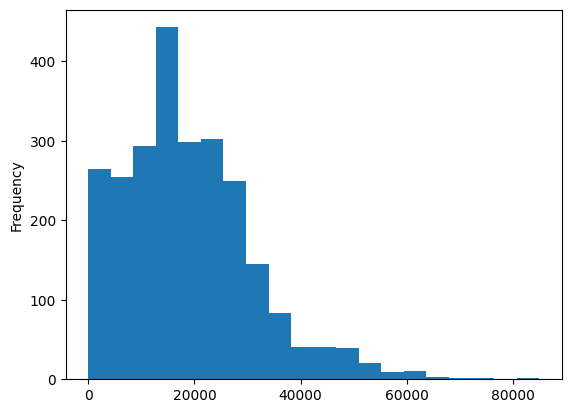

In [22]:
df["price"].plot(kind = "hist", bins = 20)

<Axes: >

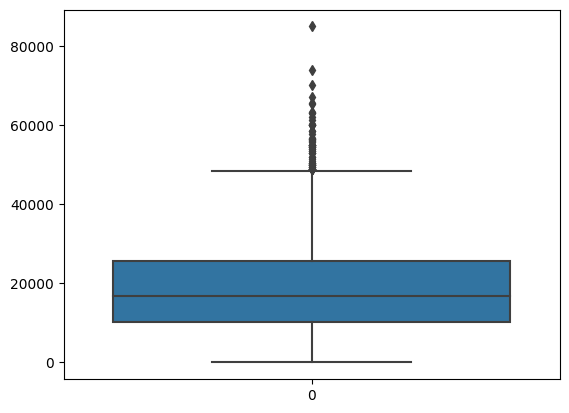

In [24]:
sns.boxplot(df["price"])

<Axes: ylabel='Density'>

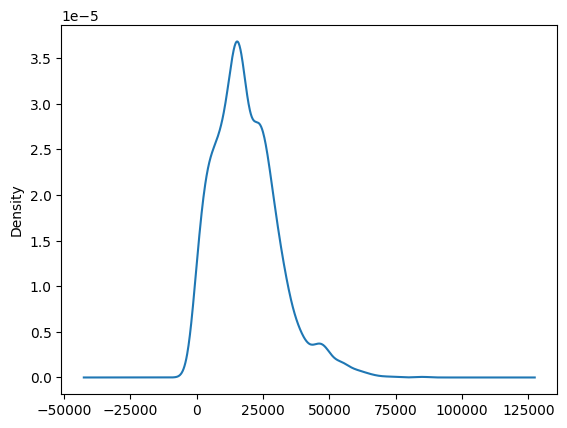

In [25]:
df["price"].plot(kind = "kde")

In [28]:
df[df["price"] > 50000].shape

(49, 12)

### Year 

**Conclusion:-**

* Year is normally distributed
* There are some outliers but they are important as the price of the cars increase for good brand and model cars as the years decrease


In [33]:
df["year"].describe()

count    2499.000000
mean     2016.714286
std         3.442656
min      1973.000000
25%      2016.000000
50%      2018.000000
75%      2019.000000
max      2020.000000
Name: year, dtype: float64

In [34]:
df["year"].value_counts()

year
2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
2008     18
2010     13
2009     11
2003      9
2006      8
2004      6
2007      6
2005      6
2001      5
1998      4
2000      4
2002      2
1994      2
1997      2
1996      2
1973      1
1999      1
1984      1
1995      1
1993      1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

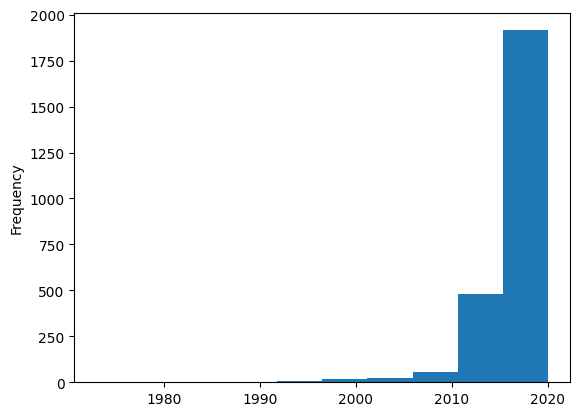

In [35]:
df["year"].plot(kind = "hist")

<Axes: ylabel='Density'>

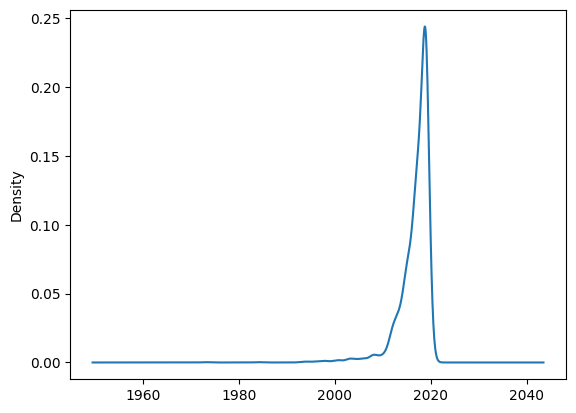

In [36]:
df["year"].plot(kind = "kde")

<Axes: >

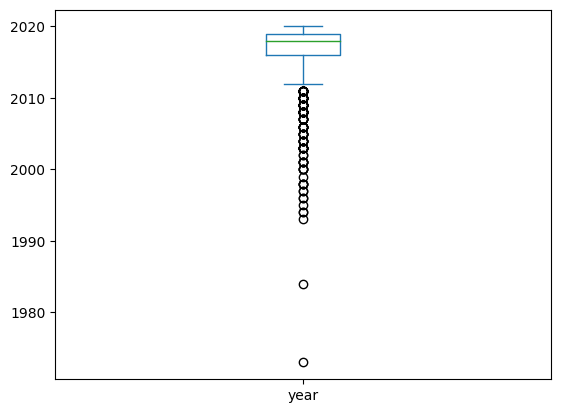

In [37]:
df["year"].plot(kind = "box")

### Mileage 

**Conclusion:-**

* Mileage is normally distributed
* There are approx 21 outliers.

<Axes: ylabel='Frequency'>

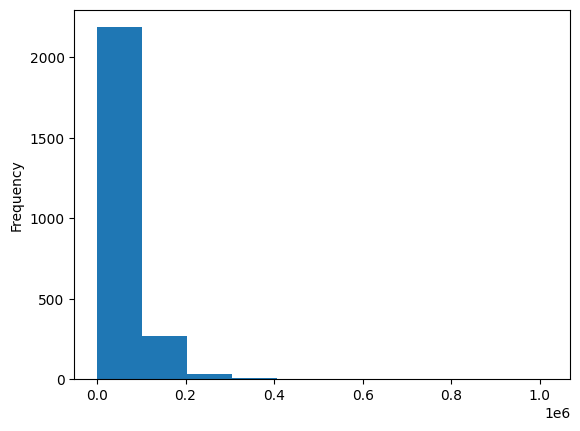

In [38]:
df["mileage"].plot(kind = "hist")

<Axes: ylabel='Density'>

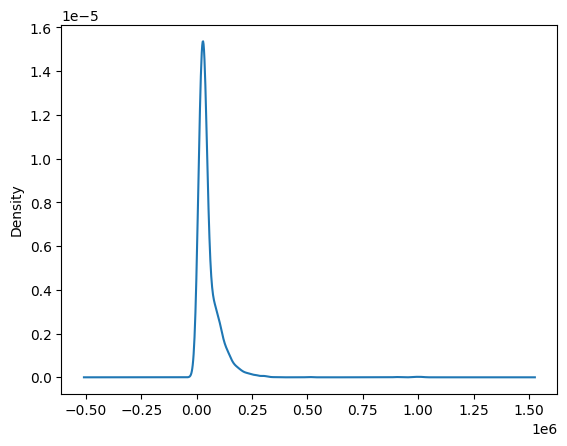

In [39]:
df["mileage"].plot(kind = "kde")

<Axes: >

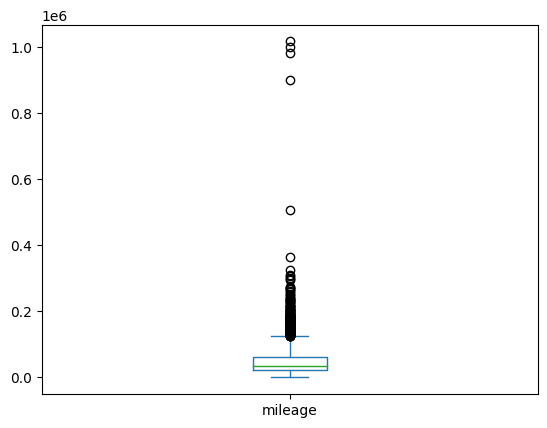

In [40]:
df["mileage"].plot(kind = "box")

In [43]:
df[df["mileage"] > 250000].shape

(21, 12)

### lot 

**Conclusion:-**

* lot is a unique number for each car (i don't think it is useful)

In [47]:
df["lot"].describe()

count    2.499000e+03
mean     1.676914e+08
std      2.038772e+05
min      1.593488e+08
25%      1.676253e+08
50%      1.677451e+08
75%      1.677798e+08
max      1.678055e+08
Name: lot, dtype: float64

<Axes: ylabel='Frequency'>

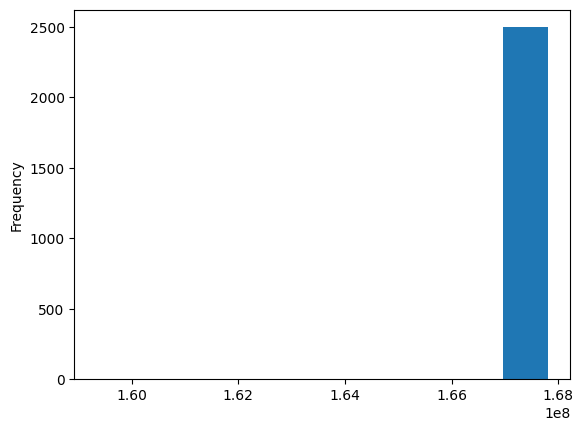

In [44]:
df["lot"].plot(kind = "hist")

<Axes: ylabel='Density'>

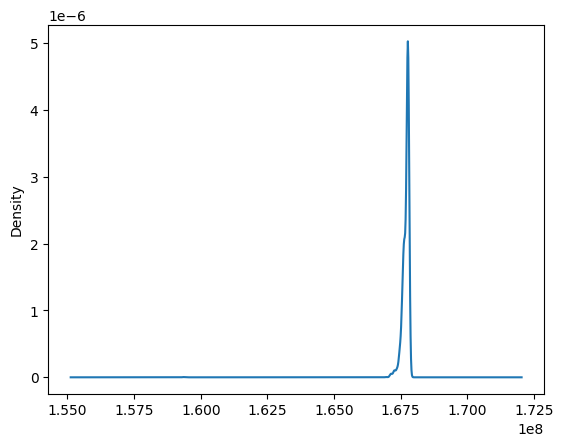

In [45]:
df["lot"].plot(kind = "kde")

<Axes: >

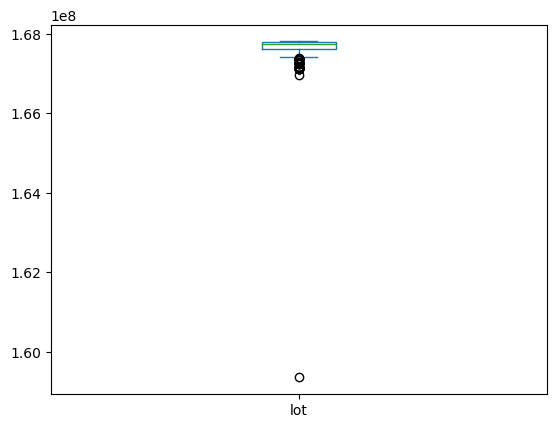

In [46]:
df["lot"].plot(kind = "box")

## Categorical Columns Univariate analysis

In [48]:
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


### Brand

**Conclusion:-**

* 